# 0.0. Preparing process

In [2]:
###--------- PANDAS - EXIBIR TODAS COLUNAS ----###

pd.set_option('display.max_columns', None)


###--------- ESTILIZAÇÃO DO NOTEBOOK ---------###

from IPython.core.display import display, HTML

# retira a margem do notebook
display(HTML("<style>.container { width:100% !important; }</style>"))

# font do texto markdown
display(HTML("<style>h1 { font-size:23px !important; }</style>"))
display(HTML("<style>h2 { font-size:20px !important; }</style>"))
display(HTML("<style>h3 { font-size:17px !important; }</style>"))
display(HTML("<style>h4 { font-size:16px !important; }</style>"))
display(HTML("<style>p { font-size:16px !important; }</style>"))

# tamanho da fonte da tabela
display(HTML("<style>th { font-size:15px !important; }</style>"))
display(HTML("<style>td { font-size:15px !important; }</style>"))

# font do codigo 
display(HTML("<style>span { font-size:16px !important; }</style>"))

In [ ]:
# CPC - SPP

# <font color='blue'> Predição de vendas das lojas Rossmann </font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão e Demonstração
5. Próximos Passos

# <font color='blue'> 1. Contexto </font>

* Houve uma reunião mensal de resultados.
* O CFO pediu para os gerentes das lojas fornecerem uma previsão de venda das próximas 6 semanas.

# <font color='blue'> 2. Desafio </font>

## Problema
- Definição do Budget para a reforma das lojas.

## Causas
- A predição de vendas atual apresenta muitas divergências.
- O processo de previsão de vendas é baseado nas vendas passadas, sem considerar a sazonalidade.
- Toda a previsão de vendas é feita manualmente pelas mais de 1000 lojas da Rossmann.
- A visualização das vendas é limitada ao computador.

## Solução
- Usar Machine Learning para prever as vendas de todas as lojas nas próximas 6 semanas.
- A visualização das previsões de vendas poderá ser feita pelo smartphone.


# <font color='blue'> 3. Desenvolvimento da Solução </font>

## Descrição dos dados

In [11]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 1017209
Number of columns: 18


## Estatística Descritiva

In [23]:
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
# Calculating the range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,303440.0,303420.0,6204.107701,2330.0,17012.897691,14.095685,239.628636
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa Mental de Hipóteses

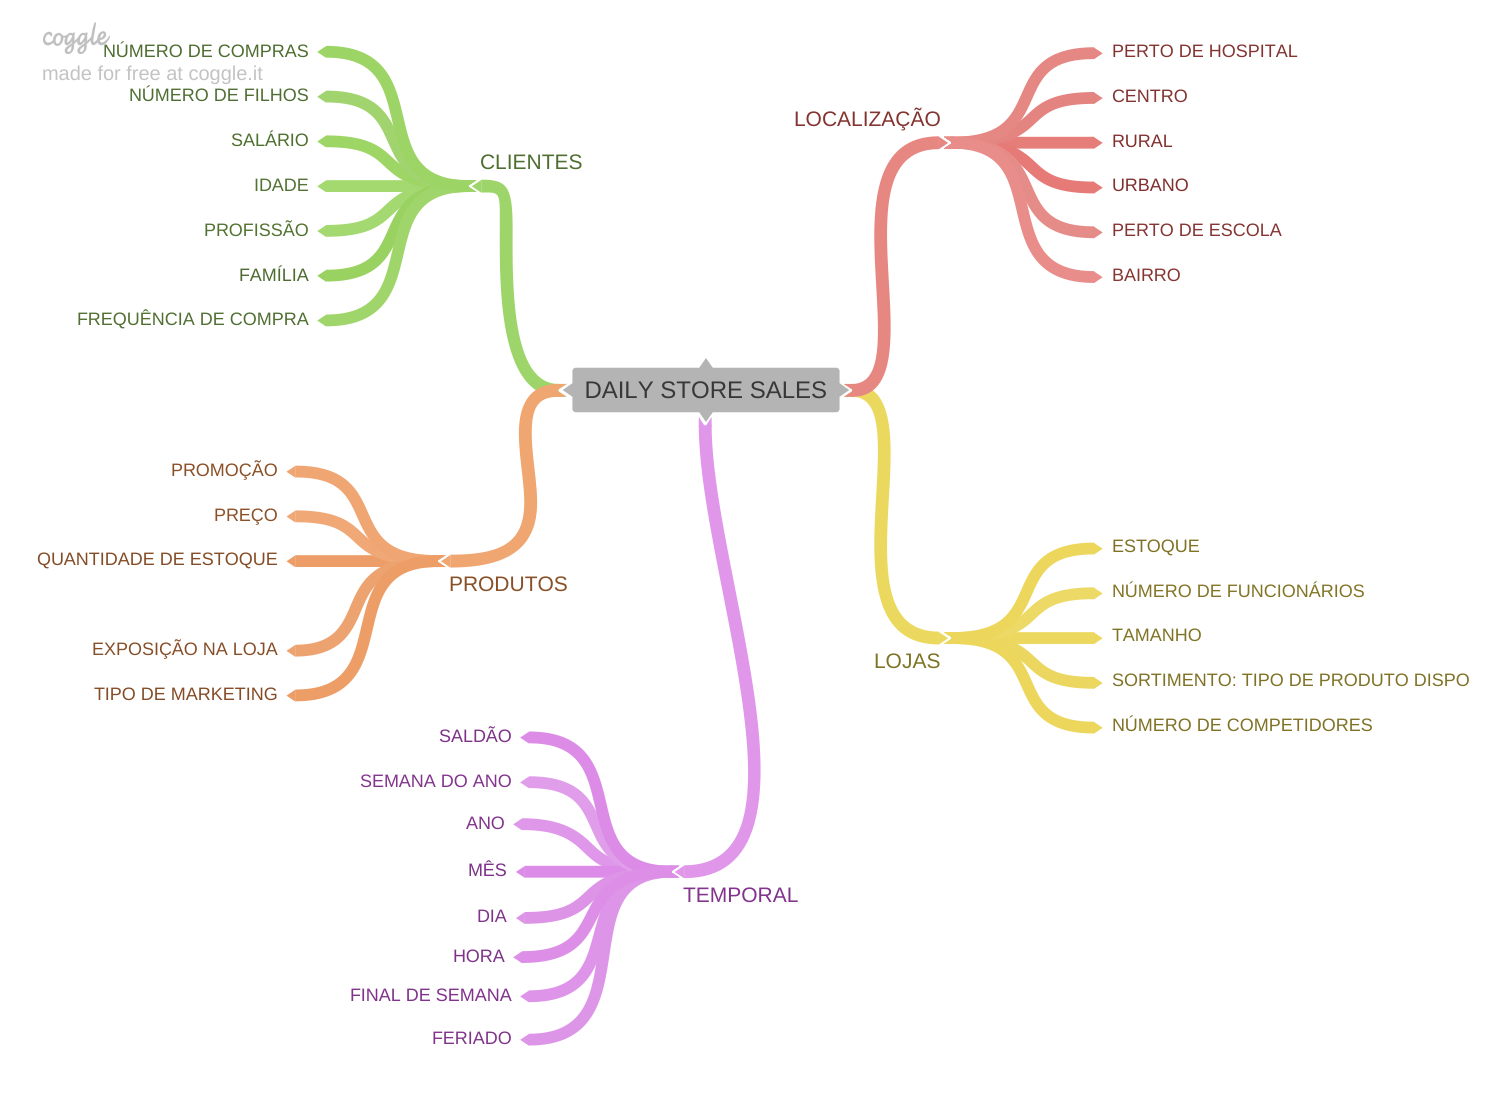

In [28]:
Image('img/mind_map.png')

# Hipóteses da Análise exploratória

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante as férias escolares.

# Análise Exploratória dos dados

# Variável Resposta

/home/gabriel/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

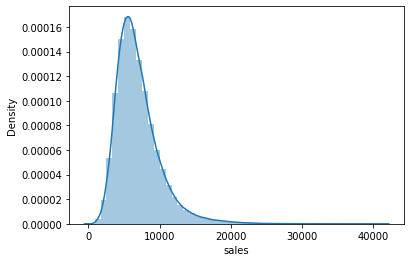

In [35]:
 sns.distplot( df4['sales'] )

# Variáveis Numéricas

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'customers'}>,
        <AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'promo'}>],
       [<AxesSubplot:title={'center':'school_holiday'}>,
        <AxesSubplot:title={'center':'competition_distance'}>,
        <AxesSubplot:title={'center':'competition_open_since_month'}>],
       [<AxesSubplot:title={'center':'competition_open_since_year'}>,
        <AxesSubplot:title={'center':'promo2'}>,
        <AxesSubplot:title={'center':'promo2_since_week'}>],
       [<AxesSubplot:title={'center':'promo2_since_year'}>,
        <AxesSubplot:title={'center':'is_promo2'}>, <AxesSubplot:>]],
      dtype=object)

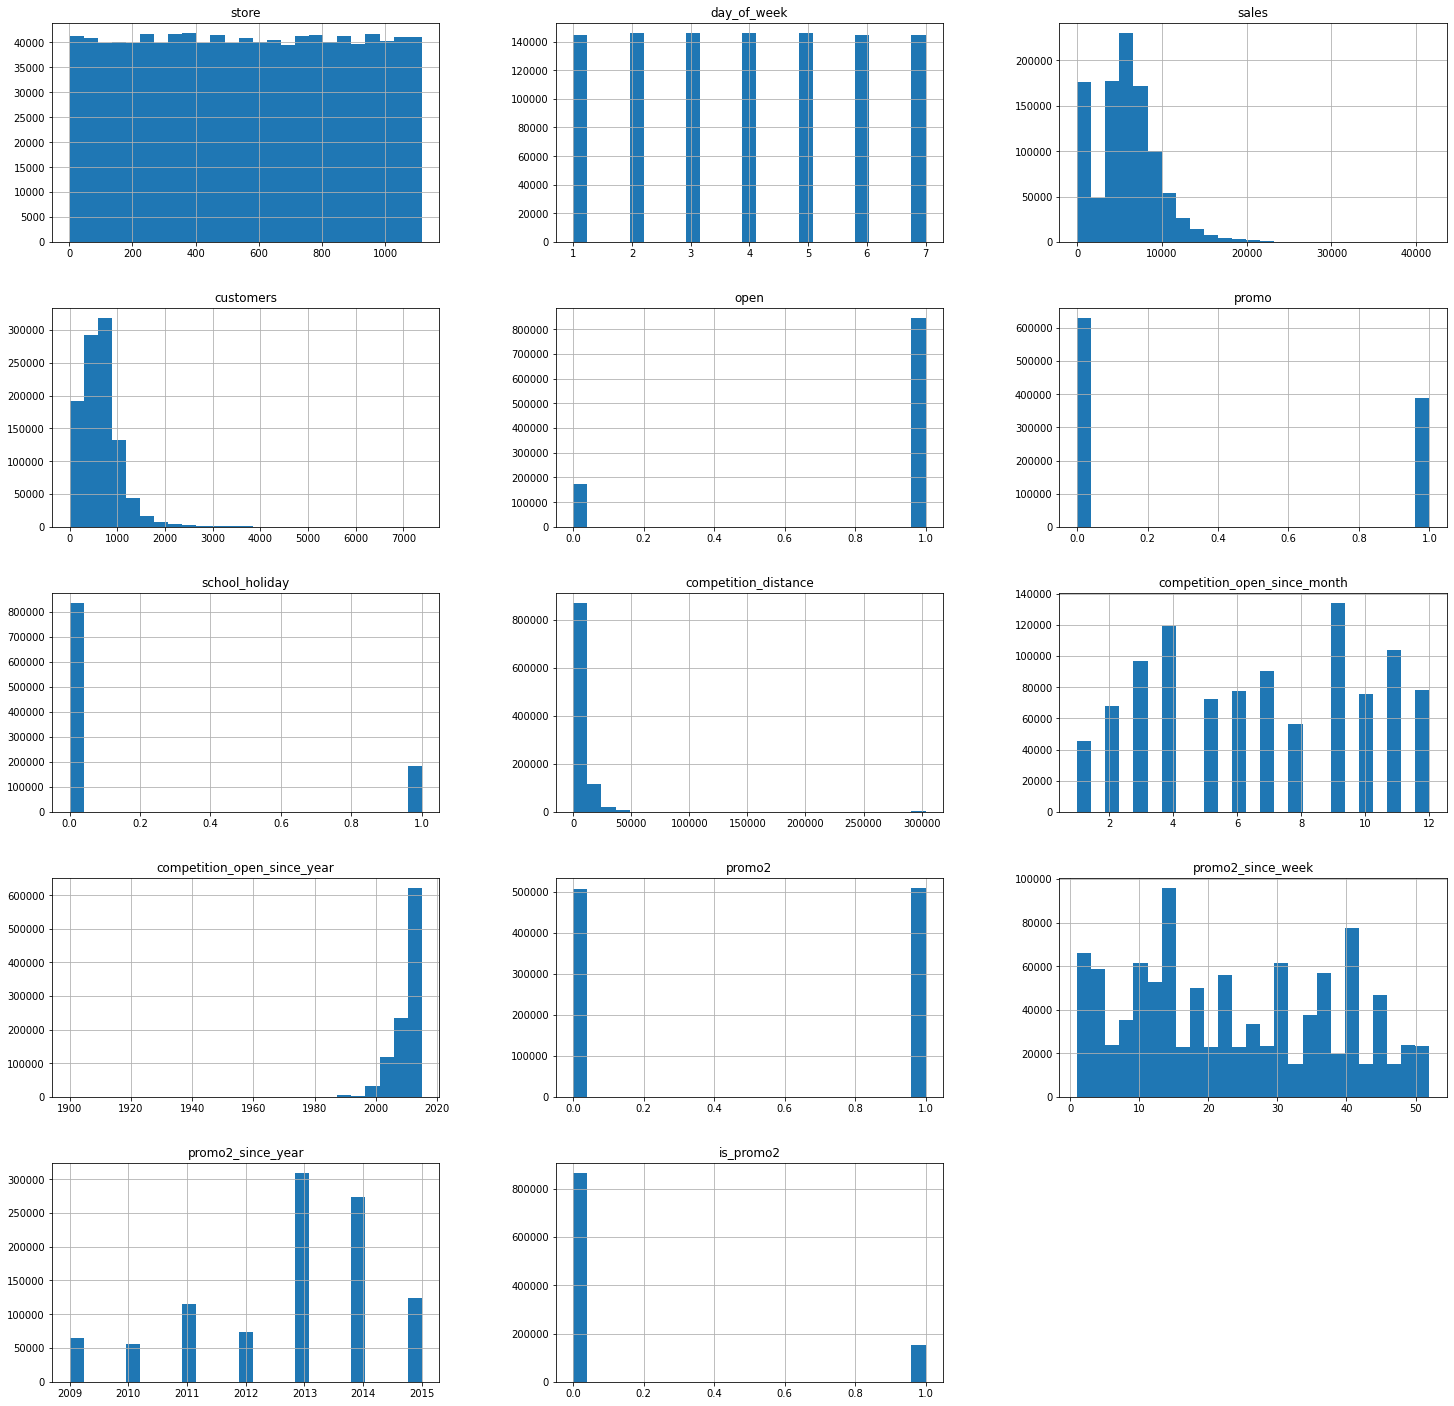

In [36]:
#num_attributes.columns
num_attributes.hist(figsize=(25,25), layout=(5,3), bins=25)

# Variáveis Categóricas

/home/gabriel/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/gabriel/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/gabriel/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


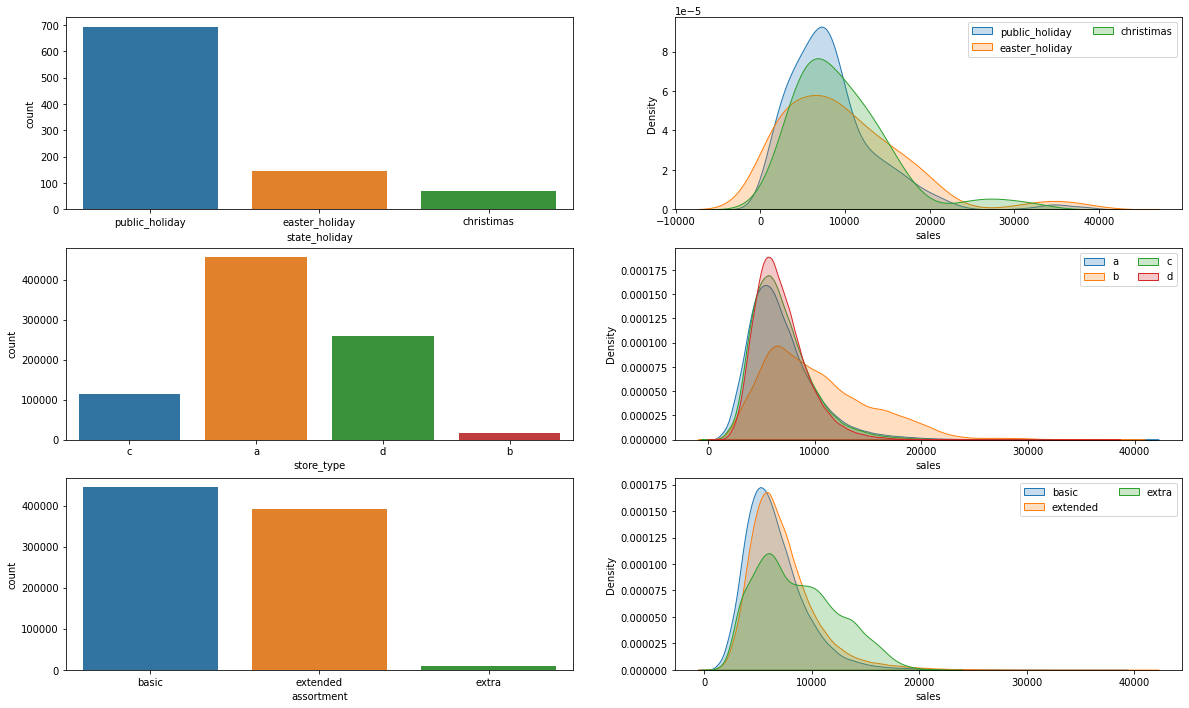

In [38]:
# state_holiday
plt.figure(figsize=(20,12))
plt.subplot(3, 2, 1)
state_holiday_without_reg_day = df4[ df4['state_holiday'] != 'regular_day']
sns.countplot( state_holiday_without_reg_day['state_holiday'] )

plt.subplot(3, 2, 2)
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday' , shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday' , shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'christimas']['sales'], label='christimas' , shade=True )
plt.legend(ncol=2, loc='upper right');


# store_type
plt.subplot(3, 2, 3)
sns.countplot( df4['store_type'] )

plt.subplot(3, 2, 4)
sns.kdeplot( df4[ df4['store_type'] == 'a']['sales'], label='a' , shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'b']['sales'], label='b' , shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'c']['sales'], label='c' , shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'd']['sales'], label='d' , shade=True )
plt.legend(ncol=2, loc='upper right');


# assortment
plt.subplot(3, 2, 5)
sns.countplot( df4['assortment'] )

plt.subplot(3, 2, 6)
sns.kdeplot( df4[ df4['assortment'] == 'basic']['sales'], label='basic' , shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'extended']['sales'], label='extended' , shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'extra']['sales'], label='extra' , shade=True )
plt.legend(ncol=2, loc='upper right');


# 'state_holiday', 'store_type', 'assortment', 'promo_interval','month_map'


# Validação das hipóteses

### HIP 1.  Lojas com maior sortimento deveriam vender mais.

### HIP 3. Lojas com competidores a mais tempo deveriam vender mais.

**VERDADEIRO** - Lojas com competidores a mais tempo vendem mais

In [ ]:
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').mean().reset_index()
aux2 = aux1[ (aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0) ]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
sns.barplot(x='competition_time_month', y='sales', data=aux1)


#plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.xticks(rotation=90)
sns.regplot(x='competition_time_month', y='sales', data=aux1)


#plt.figure(figsize=(7,7))
plt.subplot(1,3,3)
x = sns.heatmap( aux1.corr( method='pearson'), annot=True).set_title('correlacao entre vendas e distancia do ');
bottom, top = x.get_ylim()
x.set_ylim(bottom+0.5, top-0.5)

### HIP 4. Lojas com promoções ativas por mais tempo deveriam vender mais.


**VERDADEIRO** Todas as vendas com promo time negativo sao vendas feitas no periodo da promocao
tradicional, sem incluir o periodo da promocao estendida que e a promo2

In [ ]:
aux = df4[['promo_time_week', 'sales']].groupby('promo_time_week').mean().reset_index()
aux2 = aux[ (aux['promo_time_week'] > 0) ]
aux3 = aux[ (aux['promo_time_week'] <= 0) ]

grid = plt.GridSpec(3,3)

# promo 2 ativa
plt.figure(figsize=(20,10))
plt.subplot(grid[0,0])
plt.xticks(rotation=90)
sns.barplot(x='promo_time_week', y='sales', data=aux2).set_title('Periodo de funcionamento da promo 2')

plt.subplot(grid[0,1])
plt.xticks(rotation=90)
sns.regplot(x='promo_time_week', y='sales', data=aux2).set_title('Periodo de funcionamento da promo 2')


# promo 2 nao ativa
plt.subplot(grid[1,0])
plt.xticks(rotation=90)
sns.barplot(x='promo_time_week', y='sales', data=aux3).set_title('Periodo de nao funcionamento da promo 2')

plt.subplot(grid[1,1])
plt.xticks(rotation=90)
sns.regplot(x='promo_time_week', y='sales', data=aux3).set_title('Periodo de nao funcionamento da promo 2')


# promo 2 periodo total
plt.subplot(grid[2,0])
plt.xticks(rotation=90)
sns.barplot(x='promo_time_week', y='sales', data=aux).set_title('\nPeriodo total')

plt.subplot(grid[2,1])
plt.xticks(rotation=90)
sns.regplot(x='promo_time_week', y='sales', data=aux).set_title('\nPeriodo total')

plt.subplot(grid[:,2])
sns.heatmap(aux.corr(method='pearson'), annot=True).set_title('\nPeriodo total')

### HIP 5. Lojas com mais dias de promoção deveriam vender mais.


### [bom insight] HIP 6. Lojas com mais promoções consecutivas deveriam vender mais.


**FALSA** Lojas com mais promoções consecutivas vendem menos

In [ ]:
df4[['promo','promo2','sales']].groupby(['promo','promo2']).mean().reset_index()

In [ ]:
aux = df4[ (df4['promo'] == 1) & (df4['promo2'] == 1) ][['year_week', 'sales']].groupby('year_week').mean().reset_index()
ax = aux.plot(figsize=(17,7))

aux2 = df4[ (df4['promo'] == 1) & (df4['promo2'] == 0) ][['year_week', 'sales']].groupby('year_week').mean().reset_index()
aux2.plot(figsize=(17,7), ax=ax)

ax.legend(['tradicional + estendida', 'tradicional'])


### HIP 7. Lojas abertas durante o feriado de Natal deveriam vender mais.

**VERDADEIRO** No feriado de natal e de páscoa as vendas por dia são as maiores do ano - Talvez não seja um insight pois
há uma grande do pessoal de vendas saber acerca disso.

In [ ]:
aux = df4[['state_holiday', 'sales']].groupby('state_holiday').mean().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='state_holiday', y='sales', data=aux).set_title('Venda média dos tipos de dias')

plt.figure(figsize=(15,7))
aux2 = df4[['state_holiday', 'year', 'sales']].groupby(['year','state_holiday']).mean().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2).set_title('Venda média do tipo de dia ao longo dos anos')


### HIP 8. Lojas deveriam vender mais ao longo dos anos.



**FALSO** As lojas vendem menos ao longo dos anos - Não forma um insight, pois o pessoal de vendas e negócios já sabem
acerca desse fenômeno

In [ ]:
aux = df4[df4['year'] != 2015][['year', 'sales']].groupby('year').sum().reset_index()

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x='year', y='sales', data=aux).set_title('Volume de vendas por ano')

plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data=aux).set_title('Volume de vendas por ano')

plt.subplot(1,3,3)
sns.heatmap(aux.corr(method='pearson'), annot=True)

### HIP 9. Lojas deveriam vender mais no segundo semestre do ano.


**VERDADEIRO** As lojas vendem mais no segundo semestre do ano - Não gera um insight, pelo mesmo motivo do anterior.

In [ ]:
aux = df4[ ['year','month', 'sales'] ].groupby(['year', 'month']).sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='sales', hue='month', data=aux)

aux2 = df4[ df4['year'] == 2013 ][ ['month', 'sales'] ].groupby('month').sum().reset_index()
plt.figure(figsize=(15,7))
sns.regplot(x='month', y='sales', data=aux2).set_title('Vendas mensais no ano de 2013')

aux3 = df4[ df4['year'] == 2014 ][ ['month', 'sales'] ].groupby('month').sum().reset_index()
plt.figure(figsize=(15,7))
sns.regplot(x='month', y='sales', data=aux3).set_title('Vendas mensais no ano de 2014')

aux3 = df4[ df4['year'] != 2015 ][ ['month', 'sales'] ].groupby('month').sum().reset_index()
plt.figure(figsize=(15,7))
sns.regplot(x='month', y='sales', data=aux3).set_title('Vendas mensais no período 2013-2014')

### HIP 10. Lojas deveriam vender mais depois do dia 10 de cada mês.


**FALSO** Separando o mês em 3 partes, os 10 primeiros dias apresenta a maior média de vendas dos 3 períodos, desconsiderando os feriados - Não gera um insight pelo mesmo motivo anterior.

In [ ]:
aux = df4[ df4['state_holiday'] == 'regular_day' ][['day','sales']].groupby('day').mean().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='day', y='sales', data=aux)

plt.figure(figsize=(15,7))
sns.regplot(x='day', y='sales', data=aux)

aux['3_partes_do_mes'] = aux['day'].apply(lambda x: 1 if x <= 10 else 2 if ((x > 10) & (x <= 20 )) else 3)
aux2 = aux[['3_partes_do_mes', 'sales']].groupby('3_partes_do_mes').mean().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='3_partes_do_mes', y='sales', data=aux2)

plt.figure(figsize=(7,7))
sns.heatmap(aux2.corr(method='pearson'), annot=True)

### HIP 11. Lojas deveriam vender menos aos finais de semana.


**FALSO** Das lojas que vendem ao domingo, estas apresentam a maior quantidade de vendas em relação aos demais 
dias da semana - Não gera um insight pelo mesmo motivo anterior.

In [ ]:
aux = df4[['day_of_week', 'sales']].groupby('day_of_week').mean().reset_index()
print(aux)

print(df4['day_of_week'].value_counts())

plt.figure(figsize=(15,7))
sns.barplot(x='day_of_week', y='sales', data=aux)

plt.figure(figsize=(15,7))
sns.regplot(x='day_of_week', y='sales', data=aux)

plt.figure(figsize=(7,7))
sns.heatmap(aux.corr(method='pearson'), annot=True)

### HIP 12. Lojas deveriam vender menos durante as férias escolares.

**FALSO** Durante os dias que não há aulas escolares, as lojas vendem mais - Não gera um insight pelo mesmo motivo anterior

In [ ]:
aux = df4[['school_holiday','sales']].groupby('school_holiday').mean().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x='school_holiday', y='sales', data=aux)

plt.figure(figsize=(15,7))
sns.regplot(x='school_holiday', y='sales', data=aux)

plt.figure(figsize=(7,7))
sns.heatmap(aux.corr(method='pearson'), annot=True)

aux2 = df4[['school_holiday','sales', 'month']].groupby(['school_holiday', 'month']).mean().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x='month', y='sales', hue='school_holiday',data=aux2)


aux3 = df4[['school_holiday','sales', 'month']].groupby(['school_holiday', 'month']).sum().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x='month', y='sales', hue='school_holiday',data=aux3)



### RESUMO DAS HIPÓTESES

Hipótese, Conclusão, Relevância

# Análise Multivariada

# Atributos numéricos

In [3]:
correlation = num_attributes.corr(method='pearson')
plt.figure(figsize=(22,10))
sns.heatmap( correlation, annot=True )

NameError: name 'num_attributes' is not defined

# Atributos categóricos

In [ ]:
# Get all categorical data
a = df4.select_dtypes( include='object' )

# Calculate Cramer V for all combination of categorical data
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

tab = pd.DataFrame({  
                'state_holiday': [a1,a2,a3],
                'store_type': [a4,a5,a6],
                'assortment': [a7,a8,a9]})
tab.set_index(tab.columns)


In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(tab.corr(method='pearson'), annot=True)

# Machine Learning Modeling

# Comparing Model Performance

In [ ]:
models_performance = pd.concat( [baseline_resul, lr_resul, lrr_resul, rf_resul, xgb_resul] )
models_performance.sort_values( 'RMSE' )

# Comparing Model Performance - Cross validation

In [ ]:
models_performance_cv = pd.concat( [lr_resul_cv, lrr_resul_cv, rf_resul_cv, xgb_resul_cv] )
models_performance_cv.sort_values( 'RMSE' )

# <font color='blue'> 4. Conclusão e Demonstração </font>

# Error translation and interpretation

# Business Performance

In [ ]:
aux = df9[['store','quant']].groupby('store').count()
df90 = df9[['store', 'sales']].groupby('store').sum().reset_index()
df91 = df9[['store', 'predictions']].groupby('store').sum().reset_index()

# MAE e MAPE
df92 = df9[['store', 'sales', 'predictions']].groupby('store').apply( lambda x: mean_absolute_error(x['sales'], x['predictions']) ).reset_index().rename( columns={ 0: 'MAE' })
df93 = df9[['store', 'sales', 'predictions']].groupby('store').apply( lambda x: mean_absolute_percentage_error(x['sales'], x['predictions']) ).reset_index().rename( columns={ 0: 'MAPE' })

# Merge
df94 = pd.merge(df92, df93, how='inner', on='store')
df95 = pd.merge(df91, df94, how='inner', on='store')
df96 = pd.merge(df90, df95, how='inner', on='store')
df97 = pd.merge(aux, df96, how='inner', on='store')

# Scenarios
# Como as vendas de 6 semanas foram somadas, é necessário que o MAE seja multiplicado pela quantidade de vendas
# para assim indicar corretamente o melhor e pior cenário
df97['worst_scenario'] = df97['predictions'] - (df97['MAE'] * df97['quant'])
df97['best_scenario'] = df97['predictions'] + (df97['MAE'] * df97['quant'])

# order columns
df97 = df97[['store', 'sales', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]
df97

### Piores MAPEs - Mostra que há lojas mais difíceis de prever 

In [ ]:
df97.sort_values('MAPE', ascending=False).head(5)

### MAPEs de todas as lojas

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot( x='store', y='MAPE', data=df97)

# Total Performance

In [ ]:
df98 = df97[['predictions', 'best_scenario', 'worst_scenario']].apply( lambda x: np.sum( x ), axis=0).reset_index().rename( columns={'Index':'Scenario', 0: 'Values'} )
df98['Values'] = df98['Values'].map('R$ {:,.2f}'.format)
df98

# Machine Learning Performance

In [ ]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.lineplot(x='date', y='sales', data=df9, label='sales')
sns.lineplot(x='date', y='predictions', data=df9, label='predictions')

plt.subplot(2,2,2)
sns.lineplot(x='date', y='error_rate', data=df9, label='error rate')
plt.axhline(1, linestyle='--')

plt.subplot(2,2,3)
sns.distplot( df9['error'] )

plt.subplot(2,2,4)
sns.scatterplot( df9['predictions'], df9['error'] )

# <font color='blue'> 5. Próximos Passos </font>

- Workshop do modelo para os business users
- Coletar feedbacks sobre a usabilidade
- Aumentar a acurácia do modelo

# <font color='blue'> Q & A </font>

# <font color='blue'> Muito Obrigado! </font>